## Problem 1: The Chicken Nugget Problem 

At one point in time, McDonald's only sold chicken nuggets in packs of 6, 9 or 20. The Chicken Nugget problem asks: what total number of nuggets can or cannot be bought, only using combinations of these packs? See this video: https://www.youtube.com/watch?v=vNTSugyS038 if you don't believe that this is a real thing!

This is a special case of the so called *Frobenius problem* or *coin problem*: https://en.wikipedia.org/wiki/Coin_problem

1a.) 

Given a list of $k$ positive integers $S = [a_1,\dots,a_k]$, it is known that *if* the numbers in $S$ have no common factor, i.e. $gcd(a_1,\dots,a_k)=1$, then there are only finitely many integers $N$ which cannot be written as a linear combination 
$$
N = \sum_{j=1}^k c_ja_j
$$
with $c_j$ all positive integers. You can (and should) think of the above sum as an integer partition whose parts are restricted to the list $S$. This is called *Schur's Theorem*. The largest $N$ which cannot be written as such is called the *Frobenius number* of $S$, denoted $g(S)$.

It is known that if you order your values $a_1 < a_2 < \dots < a_k$, then 
$$
g(S)\leq (a_1-1)\cdot(a_2+a_3+\dots+a_k-1).
$$
Write a function which takes as input a list of positive integers $S$ and returns this upper bound on $g(S)$ (you may assume that the gcd of the numbers equals 1, but you *should not* assume the list is sorted).

In [1]:
def boundFrobenius(S):
    X = sorted(S)
    if len(S) == 0:
        print("Error")
        return
    else:
        return (X[0] - 1)*(sum(X[1:])-1)

print(boundFrobenius([6,9,20]))  #Run this code to get a bound on the chicken nugget problem

print(boundFrobenius([103,5,16,1024,75]))  #Run this code to bound a different instance of this problem

140
4868


1b.) 

Now that you have a bound on the Frobenius number of a set $S$, you can compute it explicitly. Write a function which 
- Takes as input a list $S$ of positive integers (assumed to satisfy the gcd = 1 condition)
- Returns the Frobenius number of $S$

In [2]:
def computeFrobenius(S):
    i = boundFrobenius(S)

    while Partitions(i, parts_in=S).cardinality() > 0:
        i -= 1
    return(i)

print(computeFrobenius([6,9,20]))  #Run this code to solve the chicken nugget problem

print(computeFrobenius([103,5,16,1024,75]))  #Run this code to solve a different instance of this problem

43


59


1c.) 

Below I have used your code to compute the Frobenius numbers of several two element lists $S= [a,b]$. As a function of $a$ and $b$, *roughly* how big is the Frobenius number $g([a,b])$? 

In [3]:
print(computeFrobenius([10,11]))

print(computeFrobenius([100,101]))

print(computeFrobenius([1000,1001]))

print(" ")
print("The Frobenius number g([a,b]) is roughly equal to a * b.")
print("This was a close guess, since the formula for n=2 is (a*b) - a - b!")

89
9899


998999
 
The Frobenius number g([a,b]) is roughly equal to a * b.
This was a close guess, since the formula for n=2 is (a*b) - a - b!


It turns out there is an explicit formula for two element lists; in general an explicit formula for the Frobenius number of a general list is unknown. You can see more on the Wikipedia page linked above if you are interested.

## Problem 2 Travelling College Student Problem

In the code cell below I have read in information about the location of each of the US state capitals (including Puerto Rico and DC) into a dictionary. The data was obtained from here: https://people.sc.fsu.edu/~jburkardt/datasets/states/states.html . The dictionary `capitalDict` has 
- keys: a state abbreviation string (i.e. 'AL' for ALABAMA)
- values: a tuple of floats `(latitude,longitude)` representing the coordinates of the state capital.

In [4]:
with open('state_capitals_ll.txt','r') as file:
    capitalDict = {line.split()[0]:(float(line.split()[1]),float(line.split()[2])) for line in file}

capitalDict['AL'] #Here is an example of how the data is formatted.

(32.361538, -86.279118)

2a.) 

Write a function which implements the *haversine* function in order to compute the distance between two points on earth in terms of their latitudes and longitudes. Namely, the function `greatCircleDistance` will 
- Take as input two coordinates `coord1` and `coord2`. Each coordinate will be a tuple `coord1 = (lat1,long1)` of latitudes and longitudes *in degrees*
- Convert the coordinates to their corresponding latitude and longitude *in radians*, to give `coord1 = (x_1,y_1)`, `coord2 = (x_2,y_2)`
- Returns the distance in miles between the two points as a float, given by $$
d = 2\cdot 3959 \cdot \arcsin\left(\sqrt{\sin^2(\tfrac{x_2-x_1}{2})+\cos(x_1)\cos(x_2)\sin^2(\tfrac{y_2-y_1}{2})}\right)
$$
Here 3959 is the radius of the earth in miles.

WARNING! Many people will get tripped up, potentially because you forgot to work in radians...be sure that your test answers are sensical! Illinois and Michigan are not too far away! And be sure your answer is a float! I have imported Python's math module; you can convert from degrees to radians using the `math.radians()` function. Sage has builtin functions for the rest.

In [5]:
import math
def greatCircleDistance(coord1,coord2):
    lat1,long1 = math.radians(coord1[0]), math.radians(coord1[1])
    lat2,long2 = math.radians(coord2[0]), math.radians(coord2[1])
    
    distance = 2 * 3959 * arcsin(((sin((lat2-lat1)/2))^2 + cos(lat1)*cos(lat2)*(sin((long2-long1)/2))^2)^(1/2))
    return distance

In [6]:
print(greatCircleDistance(capitalDict['MI'],capitalDict['IL']))  #Test your answer by computing this distance; make sure it makes sense!

334.3129519960563


2b.) 

Create a complete graph $G$ in Sage whose 
- vertices are labeled by the state abbreviations (the keys of capitalDict)
- edges going between State A and State B are weighted by the distance between the capitals of those states (as computed by your function in 2a)

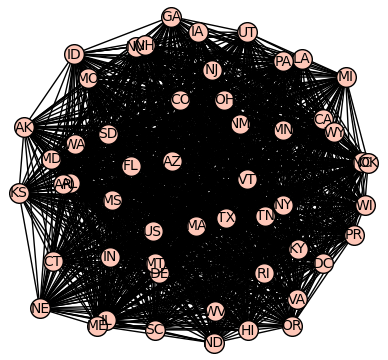

In [7]:
import itertools

G = Graph()
G.weighted(True)

G.add_vertices(capitalDict.keys())
G.add_edges([(state1[0], state2[0], greatCircleDistance(state1[1], state2[1])) for (state1, state2) in itertools.combinations(capitalDict.items(), 2)])
show(G)

2c.) 

Use Sage's builtin functionality to find the shortest way to 
- Start in Lansing, MI (the capital of Michigan)
- Visit every other state capital city exactly once
- Return to Lansing, MI

What states are connected to Michigan on this cycle? 

Hint: Sage calls this problem the *travelling salesman problem*. You can find details for solving it in the "Algorithmically hard stuff" section here: https://doc.sagemath.org/html/en/reference/graphs/sage/graphs/generic_graph.html . You do not have to print the entire cycle, although you can show it if you are curious about the path.

In [8]:
#:)

## Problem 3: Thresholds in Random Graphs

The Erdos-Renyi model of random graphs $G(n,p)$ is a method for producing a random graph on $n$ vertices. The idea is to start with a graph on $n$ vertices with *no edges*, and then for every possible pair of vertices, you add an edge between them with probability $p$. Sage has a builtin function to create such graphs, and throughout this problem you should use this builtin function. Run it a few times to see the kind of graphs that are produced (feel free to play around with n and p to see how the graph changes):

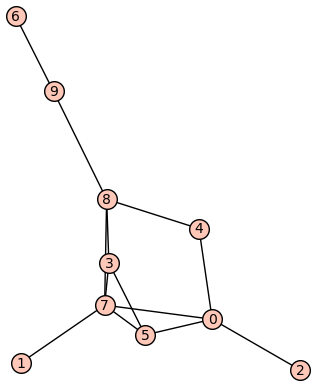

In [2]:
G = graphs.RandomGNP(10,.25)
show(G)

3a.) 

In a random graph $G(n,p)$, a higher value of $p$ will lead to a higher number of edges in $G$. Accordingly, a higher value of $p$ will make $G$ more likely to be a connected graph. Write a function `connectedGNP(n,p)` which 
- Takes as input a positive integer $n$ and a probability $p$, $0\leq p\leq 1$. 
- Outputs an approximation of the probability that $G(n,p)$ is connected. This should be approximated by calling $G(n,p)$ 100 times and basing your answer off of this; for instance, if 53 of the graphs you create are connected, you should ouput float(53/100) = .53.

In [6]:
def connectedGNP(n,p):
    pconnect = mean([graphs.RandomGNP(n,p).is_connected() for i in range (100)])
    return float(pconnect)

In [4]:
connectedGNP(8,.25)

0.32

3b.) 

Use your function `connectedGNP` to approximate the value of $p$ for which $G(100,p)$ is connected with probability $\sim.5$. I.e. when you call `connectedGNP(100,p),` you should get an answer *reasonably close* to 1/2. To successfully approximate $p$, you will need to use *at least* two significant figures (i.e. just trying $p = .1,.2,.3,...,.9$ will not suffice).

In [5]:
for i in range(20):
    print(float(connectedGNP(100, 0.04 + 0.001 * i)), 0.04 + 0.001 * i)

0.14 0.0400000000000000
0.27 0.0410000000000000
0.18 0.0420000000000000
0.26 0.0430000000000000


0.29 0.0440000000000000
0.32 0.0450000000000000
0.38 0.0460000000000000
0.45 0.0470000000000000
0.45 0.0480000000000000


0.53 0.0490000000000000
0.51 0.0500000000000000
0.65 0.0510000000000000
0.69 0.0520000000000000
0.63 0.0530000000000000


0.62 0.0540000000000000
0.76 0.0550000000000000
0.8 0.0560000000000000
0.76 0.0570000000000000
0.74 0.0580000000000000


0.8 0.0590000000000000


The value appears to be around 0.05.

3c.) 

Let $p_0$ be the value you selected in 3b. Draw a list plot of the points `(p,connectedGNP(100,p))` for $p \in\{ p_0 - .05, p_0 - .04, ..., p_0, ..., p_0 + .04, p_0 +.05\}.$

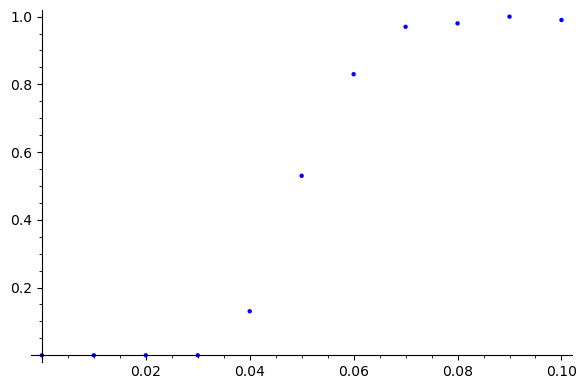

In [8]:
list_plot([(0.05 + (i * 0.01), connectedGNP(100, 0.05 + (i * 0.01))) for i in range(-5,6)])

3d.) Repeat steps 3b.) and 3c.) for $n= 1000$. This time your approximation for $p$ will require at least three significant figures, and your list plot should be for the values $p \in\{ p_0 - .005, p_0 - .004, ..., p_0, ..., p_0 + .004, p_0 +.005\}.$

In [9]:
for i in range(-5,6):
    print(float(connectedGNP(1000, 0.007 + 0.0001 * i)), 0.007 + 0.0001 * i)

list_plot([(0.007 + (i * 0.001), connectedGNP(1000, 0.007 + (i * 0.001))) for i in range(-5,6)])

0.23 0.00650000000000000


0.2 0.00660000000000000


0.27 0.00670000000000000


0.25 0.00680000000000000


0.39 0.00690000000000000


0.38 0.00700000000000000


0.42 0.00710000000000000


0.54 0.00720000000000000


0.44 0.00730000000000000


0.69 0.00740000000000000


The value appears to be around 0.0075

In general there is a formula which predicts this value of $p$ very accurately. It might be hard to guess, so I won't ask you to do it, but if you're interested in this it is a fun calculation to run through.

## Problem 4: Spectral Properties of Graphs

Given a graph $G$, the *Cheeger constant* of $G$ is a measure of the "bottlenecks" in that graph. The Cheeger constant $h(G)$ satisfies a few rules:
- $h(G)$ is a nonnegative number. It is strictly positive if and only if $G$ is connected
- If you *fix the number of vertices in a graph* and only vary the edges, then: $h(G)$ is "large" if $G$ is well connected. $h(G)$ is "small" if there are areas of poor connection in $G$.

An analogy is to think of cars driving in traffic. If a road system has a high Cheeger constant, there will be less traffic, since there are many different ways to get to your destination. If the Cheeger constant is low, then there will be huge traffic jams as everyone needs to use the same street.

If you want to know the exact formula for the Cheeger constant, you may look here: https://en.wikipedia.org/wiki/Cheeger_constant_(graph_theory)

SageMath has a builtin function which computes the Cheeger constant of a graph $G$:

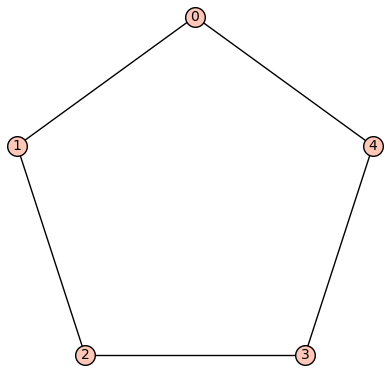

In [15]:
G = graphs.CycleGraph(5)
show(G)

In [16]:
print(G.cheeger_constant())

1/2


4a.) 

In the code cells below I have instantiated 3 graphs, all on the same number of vertices (twenty). Compute their Cheeger constants using Sage, and rank them by their Cheeger constant. Based on my brief discussion above, why does this answer make sense?

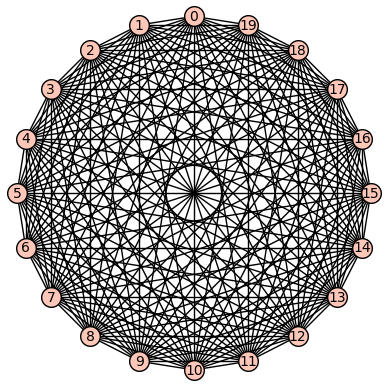

10/19


In [17]:
G1 = graphs.CompleteGraph(20)
show(G1)
print(G1.cheeger_constant())

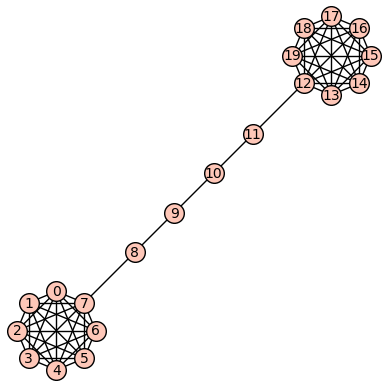

1/61


In [18]:
G2 = graphs.BarbellGraph(8,4)
show(G2)
print(G2.cheeger_constant())

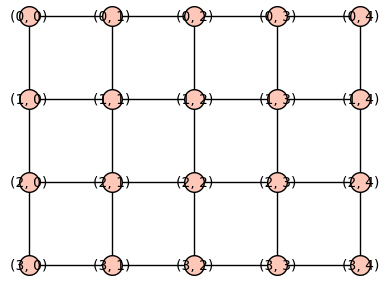

5/31


In [19]:
G3 = graphs.Grid2dGraph(4,5)
show(G3)
print(G3.cheeger_constant())

The ranking is G1, G3, G2 in order from highest to lowest Cheeger constant. This makes sense based on their "connectedness", with G2 obviously having an area in the center where if one vertice were to fail, there would be a huge bottleneck, while G1 is very well connected, and G3 is decently so. 

4b.)

Suppose $G$ is an Erdos Renyi random graph $G = G(n,p)$. *Assuming that $G$ is connected*, would you expect the Cheeger constant of $G$ to be high or low? Why or why not? Compute the Cheeger constants of a few random graphs $G(20,.25)$ and compare this to the graphs above to help you form your answer (note: $G(20,.25)$ will yield a graph with *roughly* 50 edges).

8/27


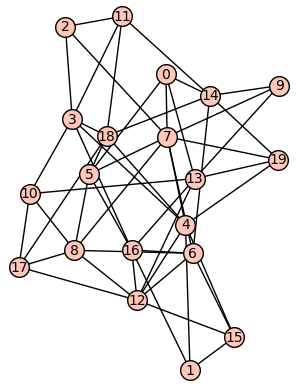

9/37


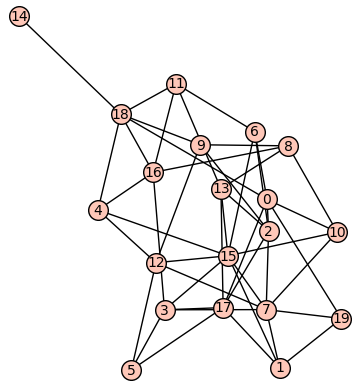

13/43


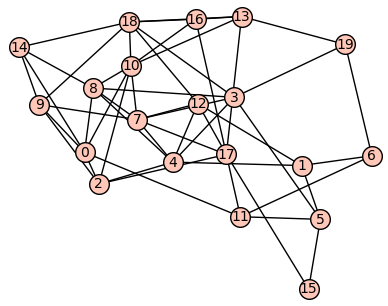

2/7


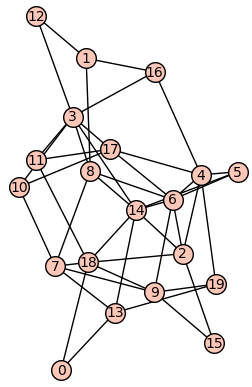

11/41


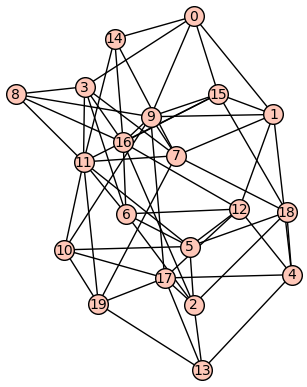

In [41]:
for i in range(5):
    print(graphs.RandomGNP(20,0.25).cheeger_constant())
    show(graphs.RandomGNP(20,0.25))

Answer here: I would expect the Cheeger constant to be relatively low (around 1/4), due to generation of multiple random graphs and the numbers from the ones above. 

4c.) 
The *Normalized Laplacian* of $G$ is defined by 
$$
\Delta(G) = D^{-1/2}(D-A)D^{-1/2},
$$
where $D$ is a diagonal matrix whose $i$th diagonal entry equals the degree of vertex $i$, and $A$ is the adjacency matrix of $G$. Here $D^{-1/2}$ just means doing the operation $x\to x^{-1/2}$ entrywise on the diagonal entries. You can compute the matrix $(D-A)$ directly in Sage using the `.kirchhoff_matrix()` function, but I think $D^{-1/2}$ will have to be hard coded. Use this to write a function `spectralGap` which 
- Takes as input a graph $G$
- Computes the eigenvalues of the Normalized Laplacian matrix $\Delta(G)$
- Returns the the second smallest eigenvalue of $\Delta(G)$.

To check your answer, there are several calls below

In [48]:
def spectralGap(G):
    DA = G.kirchhoff_matrix()
    D_neghalf = diagonal_matrix([(G.degree(i))^(-1/2) for i in G.vertices()])
    deltaG = D_neghalf * DA * D_neghalf
    secondsmallest = sorted(deltaG.eigenvalues())
    return(secondsmallest[1])

In [46]:
G = graphs.CycleGraph(10)
show(spectralGap(G))

-1/4*sqrt(5) + 3/4

In [47]:
G = graphs.CompleteGraph(8)
show(spectralGap(G))

8/7

4d.) 

The *Cheeger inequality* states that 
$$
\tfrac{\lambda}{2}\leq h(G)
$$
where $\lambda$ is the eigenvalue found in part 4c.) and $h(G)$ is the Cheeger constant of $G$. Verify this inequality on the three graphs from 4a.) using your function from 4c.).

In [76]:
def Cheeger_ineq(G):
    if spectralGap(G)/2 <= G.cheeger_constant():
        print ("True")
    else:
        print("False")
        
Cheeger_ineq(graphs.CompleteGraph(10))
Cheeger_ineq(graphs.PetersenGraph())

True
True


Theorems like the Cheeger Inequality are very nice, because you can use them to actually *prove* that random graphs have pretty good network properties. I guess that's a story for a different class though.

## Problem 5: Permutations

5a.)

A *fixed point* in a permutation $\pi = \pi_1\dots\pi_n$ is an index $i$ for which $\pi_i = i$ (WARNING: Remember that indexing in permutations is shifted from standard Python list indexing! Permutations start at the index 1 when we talk about them mathematically). Sage has a builtin method for this: `p.fixed_points()` outputs a list of the fixed points in a permutation `p`.

A *derangement* is a permutation with no fixed points. Write a function `derange` that takes in a positive integer $n$ and returns a list of the length $n$ derangements.

In [2]:
def derange(n):
    return [perm for perm in Permutations(n) if len(perm.fixed_points()) == 0]

In [3]:
print(derange(3))

[[2, 3, 1], [3, 1, 2]]


5b.) 

By using your code in 5a.), print the ratio
$$
\frac{\text{number of  derangements of length n}}{\text{number of permutations of length n }}
$$
for $n=1,2,3,\dots,8$. Do you notice anything?

In [4]:
for n in range(1,9):
    print(len(derange(n)) / len(Permutations(n)))
    
print("This seems to be converging to some value or constant near 3.67")

0.0
0.5
0.3333333333333333
0.375
0.36666666666666664
0.3680555555555556
0.3678571428571429


0.36788194444444444
This seems to be converging to some value or constant near 3.67


5c.) 

There was once great interest in examining the length of a longest increasing subsequence in a permutation $\pi$, for various reasons. In particular, people wanted an answer to the question "If I choose a random permutation of length $N$, how long will the longest increasing subsequence in it be?"

Sage allows you to create a random permutation as follows:

In [ ]:
Permutations(10).random_element()

Collect data of the longest increasing subsequence of $10^5$ random permutations of length $100$ by using the builtin syntax `.longest_increasing_subsequence_length()`. Plot a histogram of the results you have obtained on these lengths. The distribution you are approximating is called the *Tracy-Widom distribution*: https://en.wikipedia.org/wiki/Tracy%E2%80%93Widom_distribution. It is closely related to the size of the largest eigenvalue in a random Hermitian matrix. The mean of this sequence is tightly centered around $\sqrt{2n}$, meaning that the vast majority of permutations of length $100$ have a longest increasing subsequence of length $\sim 15$.

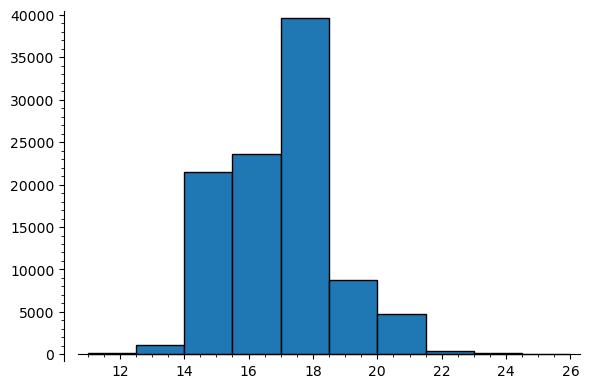

In [71]:
histogram([Permutations(100).random_element().longest_increasing_subsequence_length() for i in range(10^5)])